# Old Code to Analyze 3PT Shooting data vs FT%
Use with FT_3PT_NBA.ipynb which generates the data required

In [1]:
import pandas as pd 
import numpy as np
import matplotlib.pyplot as plt
data = pd.read_csv("fdata/players_3PT_shooting_2017_20_cum.csv")

In [2]:
# print(data)
# data = data.loc[:, ~data.columns.str.contains('^Unnamed')]
# data.to_csv("players_3PT_shooting_2017_20_cum.csv",index=False)
data.head()

,pID,Player_Name,FG3M,FG3A,FG3_PCT,FTM,FTA,FT_PCT,FG3M_CnS,FG3A_CnS,FG3_PCT_CnS,FG3M_PUP,FG3A_PUP,FG3_PCT_PUP,FG3M_O,FG3A_O,FG3_PCT_O,FG3M_WO,FG3A_WO,FG3_PCT_WO
0,200746,['LaMarcus Aldridge'],27,92,0.293,334,399,0.837,24,81,0.296,3,10,0.300,6,16,0.375,20,65,0.308
1,202329,['Al-Farouq Aminu'],125,339,0.369,59,80,0.738,116,312,0.372,9,25,0.360,32,93,0.344,83,221,0.376
2,203937,['Kyle Anderson'],19,57,0.333,104,146,0.712,18,50,0.360,1,6,0.167,3,10,0.300,16,42,0.381
3,201583,['Ryan Anderson'],131,339,0.386,72,93,0.774,118,308,0.383,8,25,0.320,40,117,0.342,90,219,0.411
4,203507,['Giannis Antetokounmpo'],43,140,0.307,487,641,0.760,30,86,0.349,11,50,0.220,7,27,0.259,34,102,0.333


In [3]:
is_attempts = data['FG3A']>150 
data1 = data.loc[(data['FG3A'] >= 150) & (data['FTA'] >= 150)]
# print(is_attempts.head())
# data1 = data[is_attempts]
data1.head()

,pID,Player_Name,FG3M,FG3A,FG3_PCT,FTM,FTA,FT_PCT,FG3M_CnS,FG3A_CnS,FG3_PCT_CnS,FG3M_PUP,FG3A_PUP,FG3_PCT_PUP,FG3M_O,FG3A_O,FG3_PCT_O,FG3M_WO,FG3A_WO,FG3_PCT_WO
5,2546,['Carmelo Anthony'],169,474,0.357,148,193,0.767,141,378,0.373,22,75,0.293,58,190,0.305,80,191,0.419
8,201571,['D.J. Augustin'],114,272,0.419,164,189,0.868,66,151,0.437,47,113,0.416,64,127,0.504,40,103,0.388
11,203084,['Harrison Barnes'],119,333,0.357,259,313,0.827,88,251,0.351,29,77,0.377,32,109,0.294,81,208,0.389
12,203115,['Will Barton'],156,422,0.370,182,226,0.805,97,244,0.398,55,163,0.337,63,207,0.304,71,155,0.458
14,203145,['Kent Bazemore'],108,274,0.394,160,201,0.796,74,176,0.420,31,93,0.333,28,88,0.318,72,167,0.431


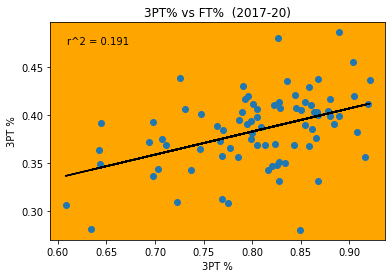

0.19134796238429774


In [4]:
# Plotting Routine and r^2 value for FT Shooting and 3PT shooting
x = data1['FT_PCT']
y = data1['FG3_PCT_CnS']
m, b = np.polyfit(x, y, 1)
z = m*np.asarray(x)+b
# PLot figure
fig = plt.figure()
fig.patch.set(facecolor = "White")
fig.patch.set(alpha = 1.0)
ax = fig.add_subplot(111)
ax.patch.set(facecolor = "Orange")
ax.patch.set(alpha = 1.0)
plt.scatter(x,y)
plt.ylabel('3PT %')
plt.xlabel('3PT %')
plt.title('3PT% vs FT%  (2017-20)') #.format('Catch & Shoot')
# plt.xlim(0.6,0.95)
# plt.ylim(0.25,0.5)  
plt.plot(x,z,'k-')
correlation_matrix = np. corrcoef([x, y])
correlation_xy = correlation_matrix[0,1]
r_squared = correlation_xy**2.
# plt.annotate("r^2 = {:.3f}".format(r_squared), (0.3, 0.45))
plt.text(0.05, 0.9, "r^2 = {:.3f}".format(r_squared), transform=plt.gca().transAxes)
# plt.savefig('Three_Pt_Pt_{0}.png'.format('CnS'), dpi=300)
plt.show()

print(r_squared)
